In [1]:
import numpy as np
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pymysql

In [2]:
wallmart = pd.read_csv('Walmart.csv', sep = ',', dtype={'Store':'category'})

In [3]:
wallmart = wallmart.rename(columns = {
    'Store' : 'Loja',
    'date' : 'Data', 
    'Weekly_Sales' : 'Vendas', 
    'Holiday_Flag' : 'Feriados', 
    'Temperature' : 'Temperatura', 
    'Fuel_Price' : 'Preço combustível',
    'CPI' : 'IPC', 
    'Unemployment' : 'Desemprego'            
})

In [4]:
pd.to_datetime(wallmart.Date)
wallmart.Date = pd.to_datetime(wallmart.Date)

In [5]:
wallmart[0:5]

,Loja,Date,Vendas,Feriados,Temperatura,Preço combustível,IPC,Desemprego
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
wallmart['Ano'] = pd.DatetimeIndex(wallmart['Date']).year 
ano_media = wallmart[wallmart.columns[2:9]].groupby('Ano').mean()
ano_media

,Vendas,Feriados,Temperatura,Preço combustível,IPC,Desemprego
Ano,,,,,,
2010,1.059670e+06,0.083333,60.266958,2.823767,168.101782,8.492714
2011,1.046239e+06,0.076923,58.798530,3.561915,171.545716,8.082036
2012,1.033660e+06,0.046512,63.362403,3.709776,175.498781,7.347964


In [7]:
#Transformando umas das colunas no index do dataframe
# df.set_index('título da coluna)
dtwallmart = wallmart.set_index('Date')
dtwallmart


,Loja,Vendas,Feriados,Temperatura,Preço combustível,IPC,Desemprego,Ano
Date,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010
...,...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684,2012
2012-05-10,45,733455.07,0,64.89,3.985,192.170412,8.667,2012
2012-12-10,45,734464.36,0,54.47,4.000,192.327265,8.667,2012


<AxesSubplot:xlabel='Date'>

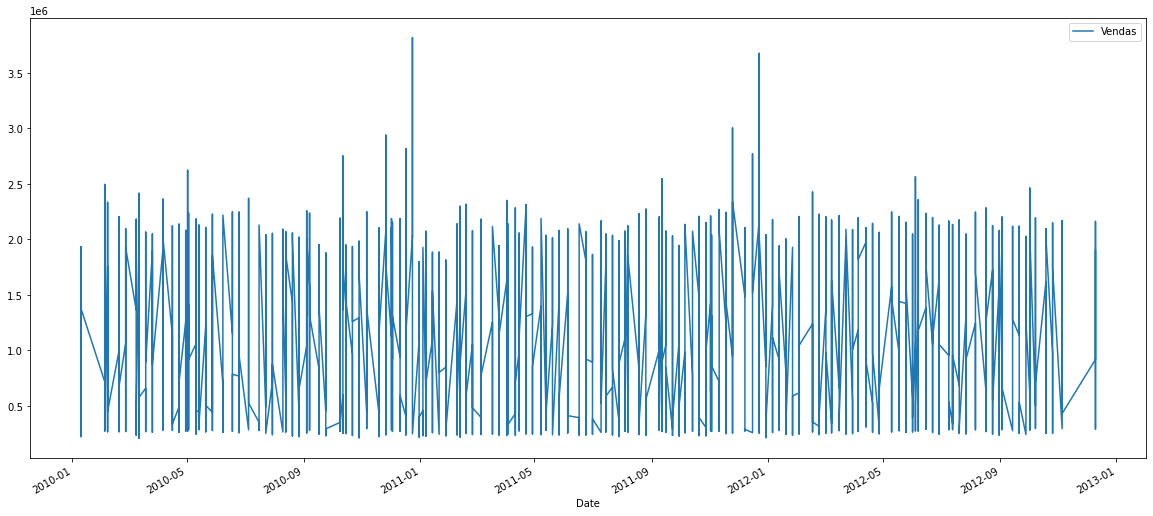

In [8]:
dtwallmart.drop(['Ano','IPC','Feriados','Preço combustível', 'Desemprego', 'Temperatura'], axis = 1).plot(figsize = (20,9))

In [9]:
lojawallmart = round(wallmart.groupby(['Loja','Ano']).sum())
display(lojawallmart[0:10])
lojawallmart.shape

Vendas  Feriados  Temperatura  Preço combustível      IPC  \
Loja Ano                                                                   
1    2010  73278832.0         4       3240.0              129.0  10143.0   
     2011  80921919.0         4       3518.0              178.0  11214.0   
     2012  68202058.0         2       3010.0              153.0   9531.0   
10   2010  94472202.0         4       3463.0              146.0   6066.0   
     2011  98916895.0         4       3674.0              194.0   6710.0   
     2012  78228617.0         2       3194.0              171.0   5625.0   
11   2010  65255138.0         4       3411.0              129.0  10302.0   
     2011  70523583.0         4       3791.0              178.0  11389.0   
     2012  58184066.0         2       3163.0              153.0   9682.0   
12   2010  48370384.0         4       3372.0              147.0   6066.0   

           Desemprego  
Loja Ano               
1    2010       377.0  
     2011       406.0  
     2012       304.0  
10   2010       448.0  
     2011       433.0  
     2012       315.0  
11   2010       356.0  
     2011       389.0  
     2012       282.0  
12   2010       680.0

(135, 6)

In [10]:
wallmart['Mes'] = pd.DatetimeIndex(wallmart['Date']).month
round(wallmart.groupby(['Loja','Ano','Mes']).mean())[0:36]

Vendas  Feriados  Temperatura  Preço combustível    IPC  \
Loja Ano  Mes                                                               
1    2010 1    1453330.0       0.0         72.0                3.0  212.0   
          2    1527271.0       0.0         57.0                3.0  211.0   
          3    1491286.0       0.0         59.0                3.0  211.0   
          4    1474485.0       0.0         70.0                3.0  211.0   
          5    1512690.0       0.0         63.0                3.0  211.0   
          6    1510496.0       0.0         85.0                3.0  211.0   
          7    1452486.0       0.0         80.0                3.0  211.0   
          8    1494675.0       0.0         81.0                3.0  212.0   
          9    1468416.0       0.0         77.0                3.0  211.0   
          10   1475829.0       0.0         66.0                3.0  212.0   
          11   1660656.0       0.0         65.0                3.0  212.0   
          12   1703714.0       0.0         51.0                3.0  211.0   
     2011 1    1403784.0       0.0         54.0                3.0  213.0   
          2    1569489.0       0.0         64.0                3.0  215.0   
          3    1584333.0       0.0         72.0                4.0  215.0   
          4    1586654.0       0.0         62.0                3.0  215.0   
          5    1530856.0       0.0         78.0                4.0  216.0   
          6    1533445.0       0.0         78.0                4.0  215.0   
          7    1455998.0       0.0         76.0                3.0  215.0   
          8    1536141.0       0.0         83.0                4.0  215.0   
          9    1525799.0       0.0         71.0                3.0  217.0   
          10   1507572.0       0.0         71.0                3.0  217.0   
          11   1674110.0       0.0         54.0                3.0  216.0   
          12   1793494.0       0.0         59.0                3.0  218.0   
     2012 1    1449450.0       0.0         59.0                3.0  220.0   
          2    1682560.0       0.0         55.0                4.0  221.0   
          3    1621124.0       0.0         68.0                4.0  221.0   
          4    1574014.0       0.0         70.0                4.0  222.0   
          5    1607377.0       0.0         72.0                4.0  222.0   
          6    1653129.0       0.0         74.0                3.0  221.0   
          7    1531465.0       0.0         81.0                3.0  222.0   
          8    1592826.0       0.0         80.0                4.0  222.0   
          9    1534011.0       0.0         70.0                4.0  222.0   
          10   1599154.0       0.0         68.0                4.0  222.0   
          11   1611096.0       0.0         74.0                4.0  222.0   
          12   1573073.0       0.0         63.0                4.0  223.0   

               Desemprego  
Loja Ano  Mes              
1    2010 1           8.0  
          2           8.0  
          3           8.0  
          4           8.0  
          5           8.0  
          6           8.0  
          7           8.0  
          8           8.0  
          9           8.0  
          10          8.0  
          11          8.0  
          12          8.0  
     2011 1           8.0  
          2           8.0  
          3           8.0  
          4           8.0  
          5           8.0  
          6           8.0  
          7           8.0  
          8           8.0  
          9           8.0  
          10          8.0  
          11          8.0  
          12          8.0  
     2012 1           7.0  
          2           7.0  
          3           7.0  
          4           7.0  
          5           7.0  
          6           7.0  
          7           7.0  
          8           7.0  
          9           7.0  
          10          7.0  
          11          7.0  
          12          7.0

### Gráfico de médias móveis por loja

<AxesSubplot:xlabel='Date'>

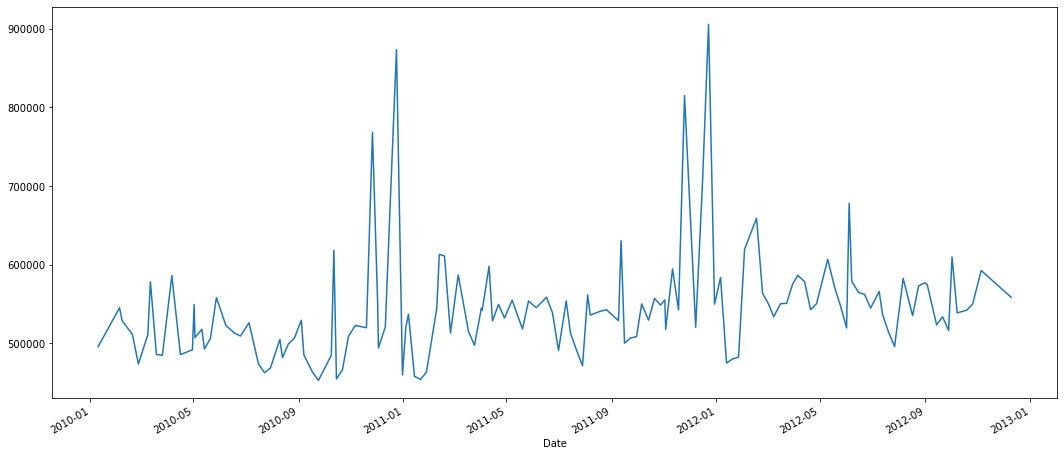

In [11]:
loja9 = dtwallmart[dtwallmart['Loja'] == '9']
loja9.Vendas.plot(figsize = (18,8))

### Gráfico de vendas acumuladas por loja

<AxesSubplot:xlabel='Date'>

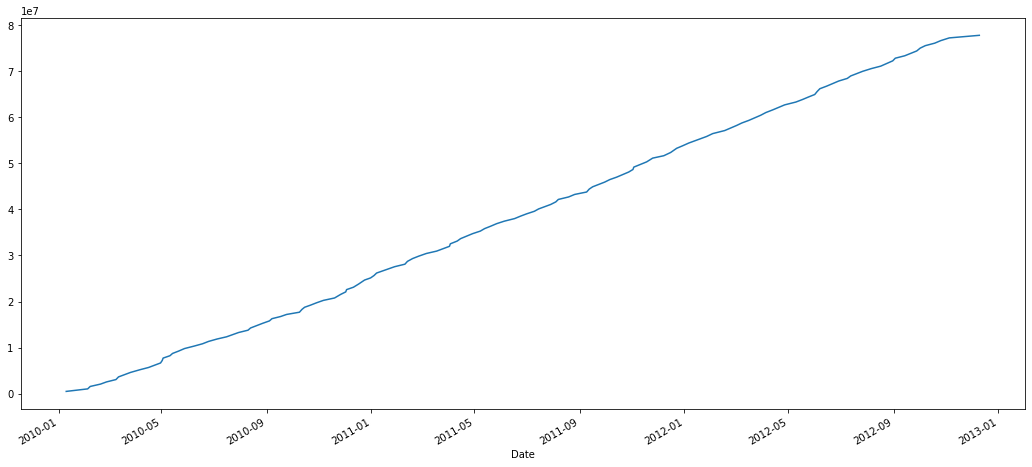

In [12]:
#loja9c = dtwallmart[dtwallmart['Loja'] == '9']
loja9c = loja9.sort_values(by = ['Date'])
loja9cum = loja9c['Vendas'].cumsum()
loja9cum.plot(figsize = (18,8))

<AxesSubplot:xlabel='Date'>

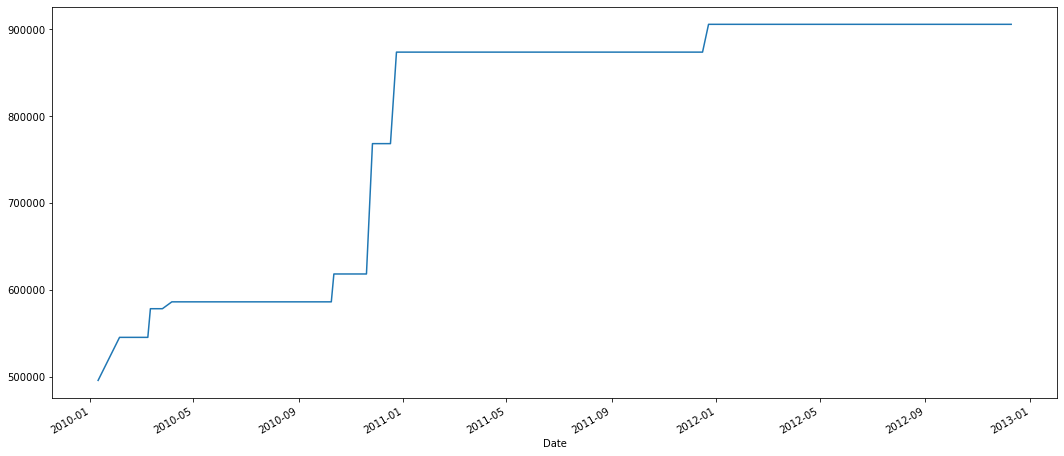

In [13]:
loja9max = loja9c['Vendas'].cummax()
loja9max.plot(figsize = (18,8))

<AxesSubplot:xlabel='Date'>

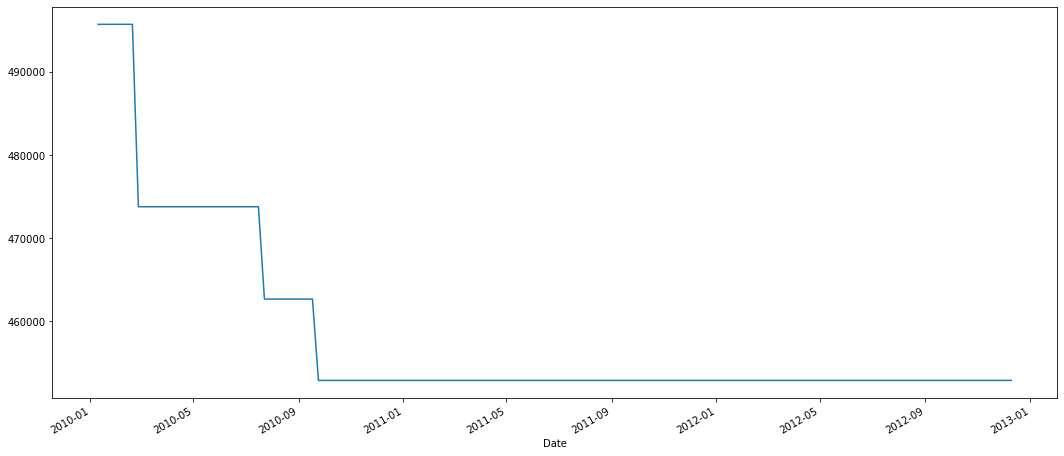

In [14]:
loja9max = loja9c['Vendas'].cummin()
loja9max.plot(figsize = (18,8))

In [15]:
loja9cum

Date
2010-01-10      495692.19
2010-02-04     1040898.51
2010-02-07     1569731.05
2010-02-19     2081058.95
2010-02-26     2554832.22
                 ...     
2012-10-08    75546440.94
2012-10-19    76088450.40
2012-10-26    76638181.89
2012-11-05    77230754.19
2012-12-10    77789218.99
Name: Vendas, Length: 143, dtype: float64

### Cálculo do número de semanas em que as vendas superou o valor médio de vendas

In [16]:
loja9['Vendas'].mean()
L9 = loja9[loja9['Vendas'] > 543980]

In [17]:
print (round(len(L9)/len(loja9),2))

0.43


In [18]:
len(loja9)

143

In [19]:
loja9.corr()

,Vendas,Feriados,Temperatura,Preço combustível,IPC,Desemprego,Ano
Vendas,1.000000,0.179264,-0.208343,0.205404,0.294805,-0.191534,0.199599
Feriados,0.179264,1.000000,-0.206895,-0.085903,-0.028947,0.050519,-0.056783
Temperatura,-0.208343,-0.206895,1.000000,0.248028,0.131792,-0.110462,0.086844
Preço combustível,0.205404,-0.085903,0.248028,1.000000,0.754134,-0.541517,0.809769
IPC,0.294805,-0.028947,0.131792,0.754134,1.000000,-0.919088,0.947898
Desemprego,-0.191534,0.050519,-0.110462,-0.541517,-0.919088,1.000000,-0.861443
Ano,0.199599,-0.056783,0.086844,0.809769,0.947898,-0.861443,1.000000


<AxesSubplot:>

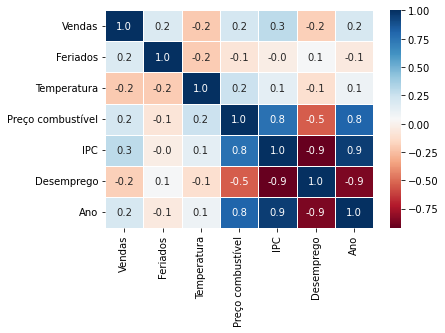

In [20]:
sns.heatmap(loja9.corr(), annot = True, cmap="RdBu", fmt=".1f", linewidths=.6)


In [37]:
loja9.groupby(['Feriados']).mean()

,Vendas,Temperatura,Preço combustível,IPC,Desemprego,Ano
Feriados,,,,,,
0,540599.329173,68.657895,3.229729,219.661808,6.093489,2010.977444
1,588950.821000,56.035000,3.086300,219.159610,6.184900,2010.800000
